```
导入本次实验需要的软件包，用来完成对本次实验所需数据集的分析、处理、以及可视化操作。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import matplotlib
import seaborn as sns
from pandas import Series,DataFrame
sns.set()

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
```

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import matplotlib
import seaborn as sns
from pandas import Series,DataFrame
sns.set()

#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


这里注意， tushare版本需大于**1.2.10** 

**token获取方式**，请注册[tushre账号](https://tushare.pro/)

In [101]:
#ts.set_token('')
#初始化pro接口
pro = ts.pro_api('74dfd55d8a7dcef594d8424f9f331e9bf8c678bb51be0cc67462947f')

In [102]:
#获取股票基础信息数据，包括股票代码、名称、上市日期，行业、概念等
head_five = pro.stock_basic()
head_five.head(5)#显示前5

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,主板,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


In [103]:
#只显示中国平安
head_five[head_five['ts_code' ]== '000001.SZ']

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403


```
获取中国平安、万科、国农科技的5000条历史数据
daily_info = pro.daily()
#中国平安
zgpa_daily_info = pro.daily(ts_code='000001.SZ',end_date='20200714')
zgpa_daily_info.index = pd.to_datetime(zgpa_daily_info.index)
#万科
wanke_daily_info = pro.daily(ts_code='000002.SZ',end_date='20200714')
wanke_daily_info.index = pd.to_datetime(wanke_daily_info.index)
#国农科技
gnkj_daily_info = pro.daily(ts_code='000004.SZ',end_date='20200714')
gnkj_daily_info.index = pd.to_datetime(gnkj_daily_info.index)
```

In [120]:
#日线
zgpa_daily_info = pro.daily(ts_code='000001.SZ',start_date='20180701',end_date='20200714')
zgpa_daily_info.index = pd.to_datetime(zgpa_daily_info.index)

wanke_daily_info = pro.daily(ts_code='000002.SZ',start_date='20180701',end_date='20200714')
wanke_daily_info.index = pd.to_datetime(wanke_daily_info.index)

gnkj_daily_info = pro.daily(ts_code='000004.SZ',start_date='20180701',end_date='20200714')
gnkj_daily_info.index = pd.to_datetime(gnkj_daily_info.index)

In [121]:
closing_df=zgpa_daily_info[['open','close']]
closing_df['zgpa_df']=zgpa_daily_info['close']
closing_df['wanke_df']=wanke_daily_info['close']
closing_df['gnkj_df']=gnkj_daily_info['close']
del closing_df['open']
del closing_df['close']

tech_rets=closing_df.pct_change()

/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

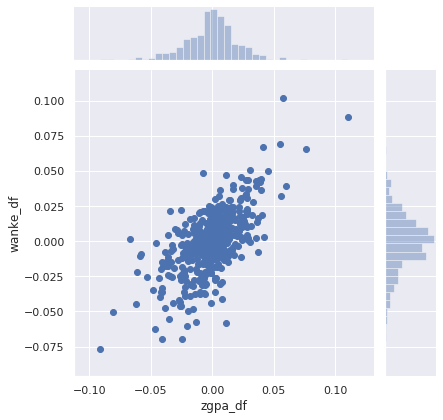

In [122]:
#请在此处输入代码
sns.jointplot('zgpa_df','wanke_df',tech_rets,kind='scatter')

```
绘制风险相关性图

rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std())
#分别设定xy的标注
plt.xlabel('expected return')
plt.ylabel('risk')
#画风险相关图
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',arrowprops=dict(arrowstyle= '-' ,connectionstyle='arc3,rad=-0.3'))
```

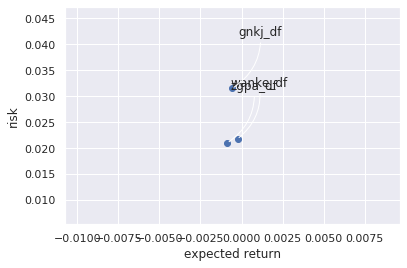

In [123]:
#请在此处输入代码
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std())
#分别设定xy的标注
plt.xlabel('expected return')
plt.ylabel('risk')
#画风险相关图
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',arrowprops=dict(arrowstyle= '-' ,connectionstyle='arc3,rad=-0.3'))


```
绘制中国平安收盘价折线图

plt.plot(zgpa_daily_info['trade_date'],zgpa_daily_info['close'],'-',label=zgpa_daily_info.ts_code[0])
```

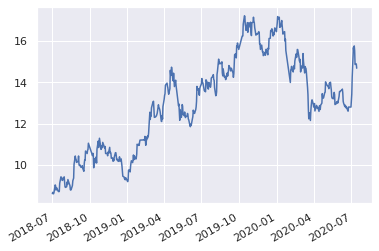

In [138]:
#转换成datatime类型
zgpa_daily_info['trade_date'] = pd.to_datetime(zgpa_daily_info['trade_date'],format="%Y%m%d")

plt.plot(zgpa_daily_info['trade_date'],zgpa_daily_info['close'],'-',label=zgpa_daily_info.ts_code[0])
#自动调整日期
plt.gcf().autofmt_xdate()
plt.show()